# Deep Learning
## HW2 - Problem 1 -Create NN from base (120pts)



1.   Full Name: Radmehr Karimian
2.   Student Number: 98103556



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch 
from torchvision import datasets, transforms

In [2]:
from torchvision.transforms import ToTensor
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()                                     
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



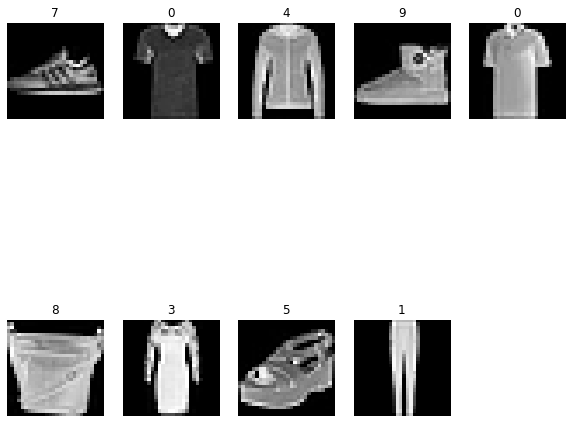

In [4]:
import random
def pelot():
  rands = np.random.randint(low=1, high=6000, size=9)
  plt.figure(figsize=(10,10))
  for i in range(1, 10):
    plt.subplot(250+i)
    img, label = ds[rands[i-1]]
    plt.gca().set_title(label)
    plt.imshow(img.squeeze(), cmap="gray"); plt.axis('off')

pelot()

In [11]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert Y_train.shape == (60000,)
assert Y_test.shape == (10000,)

In [12]:
X_train.resize((X_train.shape[0], 28*28))
X_train = np.moveaxis(X_train, 0, -1)
X_test.resize((X_test.shape[0], 28*28))
X_test = np.moveaxis(X_test, 0, -1)
X_train.shape, X_test.shape


((784, 60000), (784, 10000))

In [13]:

m, n = X_train.shape
X_train = X_train / 255
X_test = X_test / 255

In [18]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def dReLU(Z):
    return Z > 0

def Softmax(Z):
    expZ = np.exp(Z)
    A = expZ / sum(expZ)
    return A
    
def model(W1, b1, W2, b2, Xb):
    Z1 = W1.dot(Xb) + b1       
    Y1 = ReLU(Z1)             # Hidden Layer 1: ReLU 
    Z2 = W2.dot(Y1) + b2
    Yb = Softmax(Z2)          # Hidden Layer 2: Softmax
    return Z1, Y1, Z2, Yb

def hot(Y):
    hot_Y = np.zeros((Y.size, Y.max() + 1))
    hot_Y[np.arange(Y.size), Y] = 1
    hot_Y = hot_Y.T
    return hot_Y

def backward(Z1, Y1, Z2, Yb, W1, W2, X, Y):
    hot_Y = hot(Y)
    dZ2 = Yb - hot_Y
    dW2 = 1 / m * dZ2.dot(Y1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1    
    W2 = W2 - lr * dW2  
    b2 = b2 - lr * db2    
    return W1, b1, W2, b2

In [21]:
def accuracy(Y_pred, Y):
    return np.sum(Y_pred == Y) / Y.size

def predict(X, W1, b1, W2, b2):
    _, _, _, Y = model(W1, b1, W2, b2, X)
    predictions = np.argmax(Y, 0)
    return predictions

In [19]:
def SGD(X, Y, lr, iterations):
    W1, b1, W2, b2 = init_params()
    for iter in range(iterations+1):

        batch = np.random.choice(X.shape[1], 2048, replace=False)
        X_batch = X[:, batch]
        Y_batch = Y[batch]
        X_batch.shape, Y_batch.shape

        Z1, Y1, Z2, Yb = model(W1, b1, W2, b2, X_batch)
        
        dW1, db1, dW2, db2 = backward(Z1, Y1, Z2, Yb, W1, W2, X_batch, Y_batch)
        

        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        if iter % 50 == 0:
            Y_train_pred = predict(X, W1, b1, W2, b2)
            train_acc = accuracy(Y_train_pred, Y)
            Y_test_pred = predict(X_test, W1, b1, W2, b2)
            test_acc = accuracy(Y_test_pred, Y_test)
            print(f"iteration {iter}: train accuracy: {100*train_acc:.2f}%, test accuracy: {100*test_acc:.2f}%")

    return W1, b1, W2, b2

In [24]:
lr = 0.05
iterations = 1000
W1, b1, W2, b2 = SGD(X_train, Y_train, lr, iterations)

iteration 0: train accuracy: 22.34%, test accuracy: 22.20%
iteration 50: train accuracy: 70.38%, test accuracy: 70.02%
iteration 100: train accuracy: 74.65%, test accuracy: 74.14%
iteration 150: train accuracy: 76.70%, test accuracy: 76.37%
iteration 200: train accuracy: 78.41%, test accuracy: 77.91%
iteration 250: train accuracy: 79.19%, test accuracy: 78.53%
iteration 300: train accuracy: 79.42%, test accuracy: 78.90%
iteration 350: train accuracy: 80.86%, test accuracy: 80.42%
iteration 400: train accuracy: 80.79%, test accuracy: 79.89%
iteration 450: train accuracy: 81.94%, test accuracy: 81.11%
iteration 500: train accuracy: 79.56%, test accuracy: 78.52%
iteration 550: train accuracy: 82.58%, test accuracy: 81.80%
iteration 600: train accuracy: 82.96%, test accuracy: 82.10%
iteration 650: train accuracy: 82.84%, test accuracy: 81.66%
iteration 700: train accuracy: 83.41%, test accuracy: 82.33%
iteration 750: train accuracy: 83.52%, test accuracy: 82.47%
iteration 800: train accura

In [25]:
Y_test_pred = predict(X_test, W1, b1, W2, b2)
test_acc = accuracy(Y_test_pred, Y_test)
print(f"Test accuracy: {100*test_acc:.2f}%")

Test accuracy: 83.40%


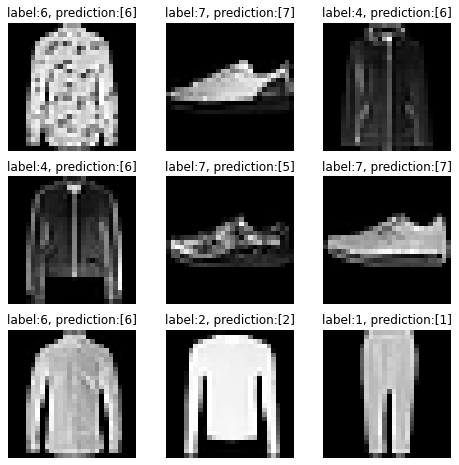

In [26]:
def plotImages2():
  rands = np.random.randint(low=1, high=6000, size=9)
  plt.figure(figsize=(8,8))
  for i in range(1, 10):
    plt.subplot(330+i)
    label = Y_train[rands[i-1]]
    img = X_train[:, rands[i-1], None].reshape((28, 28)) * 255
    prediction = predict(X_train[:, rands[i-1], None], W1, b1, W2, b2)
    plt.gca().set_title(f"label:{label}, prediction:{prediction}")
    plt.imshow(img.squeeze(), cmap="gray"); plt.axis('off')

plotImages2()